# Week 9 Independent lab: Statistics in Python

Author: Haiheng Xu  
Course: BGEN632 Grad. Intro. to Python  
Term: Spring 2025  
Date: April 26, 2025 

In [119]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [121]:
# set working directory
os.chdir("C:\\Users\\haihe\\Desktop\\Classes\\Intro to Python\\week9labs\\data")  # change this to your filepath
# Load data
e_df = pd.read_table('ect_data.txt', sep='\t')

In [123]:
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   attitude1_01  201 non-null    int64
 1   attitude1_02  201 non-null    int64
 2   attitude1_03  201 non-null    int64
 3   attitude1_04  201 non-null    int64
 4   intent1_01    201 non-null    int64
 5   intent1_02    201 non-null    int64
 6   intent1_03    201 non-null    int64
 7   intent1_04    201 non-null    int64
 8   peruse01      201 non-null    int64
 9   peruse02      201 non-null    int64
 10  peruse03      201 non-null    int64
 11  peruse04      201 non-null    int64
 12  satis01       201 non-null    int64
 13  satis02       201 non-null    int64
 14  satis03       201 non-null    int64
 15  satis04       201 non-null    int64
dtypes: int64(16)
memory usage: 25.3 KB


In [125]:
# Create a regression model

ect_reg = smf.ols('intent1_01 ~ attitude1_01 + attitude1_03 + peruse01 + satis01 + satis03', e_df).fit()

ect_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     43.65
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           4.54e-30
Time:                        16:48:37   Log-Likelihood:                -213.19
No. Observations:                 201   AIC:                             438.4
Df Residuals:                     195   BIC:                             458.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0098      0.359      2.810      0.005       0.301       1.719
attitude1_01     0.4326      0.092      4.701      0.000       0.251       0.614
attitude1_03    -0.0186      0.072     -0.259      0.796      -0.161       0.124
peruse01         0.2496      0.059      4.224      0.000       0.133       0.366
satis01          0.1598      0.073      2.194      0.029       0.016       0.303
satis03          0.0564      0.063      0.891      0.374      -0.068       0.181
==============================================================================
Omnibus:                       55.301   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.597
Skew:                          -0.969   Prob(JB):                     3.83e-55
Kurtosis:                       8.116   Cond. No.                         94.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linearity

<Axes: xlabel='attitude1_01', ylabel='intent1_01'>

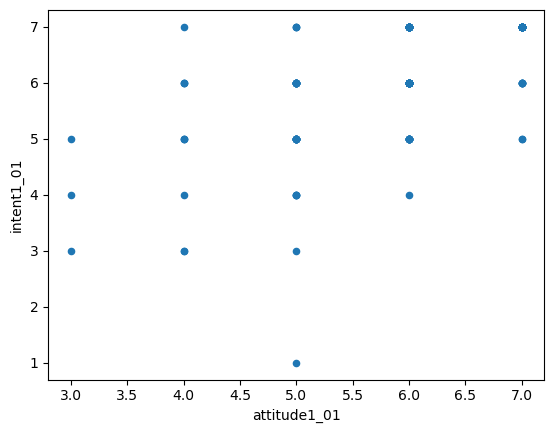

In [128]:
e_df.plot.scatter(x='attitude1_01', y='intent1_01')

<Axes: xlabel='attitude1_03', ylabel='intent1_01'>

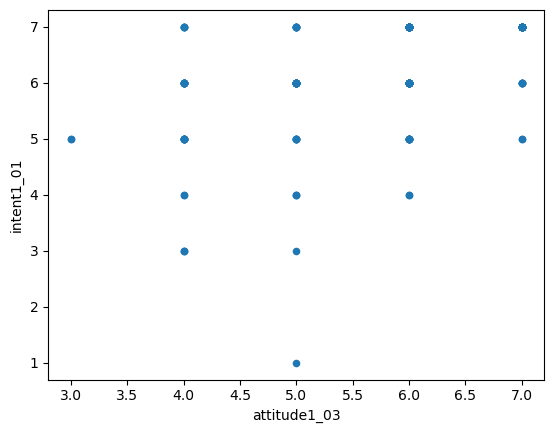

In [130]:
e_df.plot.scatter(x='attitude1_03', y='intent1_01')


<Axes: xlabel='peruse01', ylabel='intent1_01'>

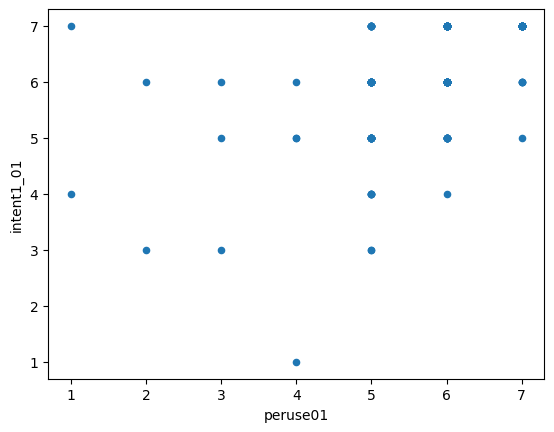

In [132]:
e_df.plot.scatter(x='peruse01', y='intent1_01')


<Axes: xlabel='satis01', ylabel='intent1_01'>

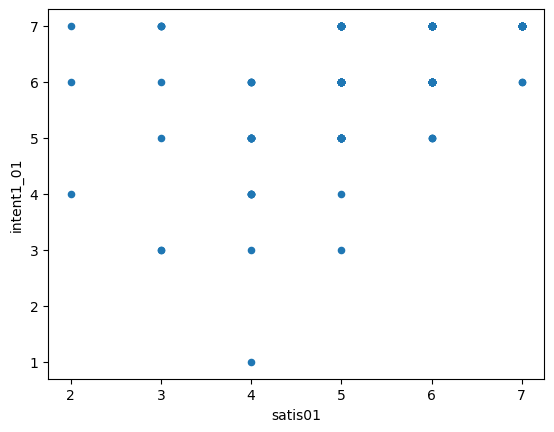

In [134]:
e_df.plot.scatter(x='satis01', y='intent1_01')


<Axes: xlabel='satis03', ylabel='intent1_01'>

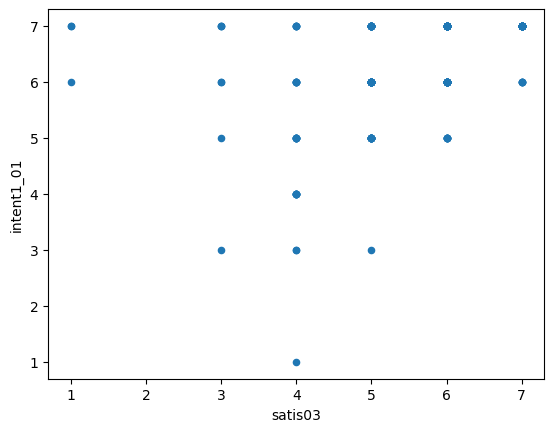

In [136]:
e_df.plot.scatter(x='satis03', y='intent1_01')


According to the scatterplots, there are no clear curve or pattern thus they are non linear.

### Collinearity

In [140]:
e_df.corr()

,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
attitude1_01,1.000000,0.781832,0.748347,0.709922,0.666356,0.687054,0.654357,0.684226,0.576265,0.593120,0.622239,0.591388,0.569608,0.549134,0.483329,0.515116
attitude1_02,0.781832,1.000000,0.660611,0.622986,0.603616,0.704362,0.647626,0.650416,0.480259,0.547582,0.615780,0.551287,0.513672,0.517255,0.466889,0.523213
attitude1_03,0.748347,0.660611,1.000000,0.858235,0.519099,0.571588,0.471573,0.612550,0.453128,0.483051,0.544584,0.511677,0.519945,0.545646,0.463918,0.539753
attitude1_04,0.709922,0.622986,0.858235,1.000000,0.512032,0.560253,0.483636,0.581335,0.454046,0.492102,0.537477,0.495368,0.515158,0.518164,0.423812,0.478193
intent1_01,0.666356,0.603616,0.519099,0.512032,1.000000,0.886908,0.827830,0.757793,0.566642,0.529681,0.595103,0.488655,0.545688,0.500534,0.430458,0.494192
intent1_02,0.687054,0.704362,0.571588,0.560253,0.886908,1.000000,0.832684,0.786367,0.517334,0.489604,0.584902,0.478759,0.518394,0.505258,0.471791,0.508628
intent1_03,0.654357,0.647626,0.471573,0.483636,0.827830,0.832684,1.000000,0.722675,0.537531,0.552217,0.581282,0.513861,0.529800,0.466569,0.441605,0.472635
intent1_04,0.684226,0.650416,0.612550,0.581335,0.757793,0.786367,0.722675,1.000000,0.497286,0.521588,0.544137,0.491533,0.590820,0.555600,0.460866,0.628003
peruse01,0.576265,0.480259,0.453128,0.454046,0.566642,0.517334,0.537531,0.497286,1.000000,0.746810,0.753397,0.683090,0.399931,0.321710,0.198159,0.295438
peruse02,0.593120,0.547582,0.483051,0.492102,0.529681,0.489604,0.552217,0.521588,0.746810,1.000000,0.732724,0.728517,0.483252,0.423262,0.287002,0.391069


In [142]:
pearsonr(e_df.attitude1_01, e_df.intent1_01)

PearsonRResult(statistic=0.6663562202246993, pvalue=3.6154224826027544e-27)

In [144]:
pearsonr(e_df.attitude1_03, e_df.intent1_01)

PearsonRResult(statistic=0.519098567478697, pvalue=2.9068684515866345e-15)

In [146]:
pearsonr(e_df.peruse01, e_df.intent1_01)

PearsonRResult(statistic=0.5666422098085826, pvalue=1.8194427998723153e-18)

In [148]:
pearsonr(e_df.satis01, e_df.intent1_01)

PearsonRResult(statistic=0.545688440252472, pvalue=5.425059701904438e-17)

In [150]:
pearsonr(e_df.satis03, e_df.intent1_01)

PearsonRResult(statistic=0.43045817597531016, pvalue=1.7930038068496418e-10)

All the PearsonR results are showing correlation coefficient around 0.5 and with low P-value.
This means there was a statistically significant, moderately positive correlation between the
variables to "intent1_01". 

### Homoscedasticity

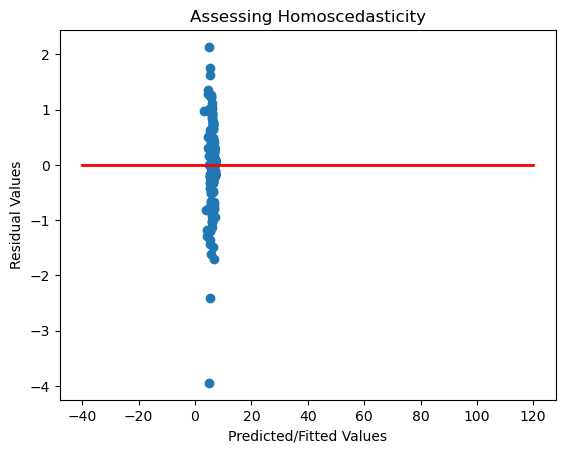

In [154]:
plt.scatter(ect_reg.fittedvalues, ect_reg.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([-40, 120],[0, 0], 'red', lw=2)   # add red horizontal line
plt.show()

The residual points are roughly constant across all predicted values with a few outliers. There is no funnel shape. Meaning it meets the homoscedasticity assumption.

### Independence

In [158]:
ect_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     43.65
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           4.54e-30
Time:                        16:48:42   Log-Likelihood:                -213.19
No. Observations:                 201   AIC:                             438.4
Df Residuals:                     195   BIC:                             458.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0098      0.359      2.810      0.005       0.301       1.719
attitude1_01     0.4326      0.092      4.701      0.000       0.251       0.614
attitude1_03    -0.0186      0.072     -0.259      0.796      -0.161       0.124
peruse01         0.2496      0.059      4.224      0.000       0.133       0.366
satis01          0.1598      0.073      2.194      0.029       0.016       0.303
satis03          0.0564      0.063      0.891      0.374      -0.068       0.181
==============================================================================
Omnibus:                       55.301   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.597
Skew:                          -0.969   Prob(JB):                     3.83e-55
Kurtosis:                       8.116   Cond. No.                         94.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The value of Durbin-Watson is 1.92 showing there is no autocorrelation so no evidence of serial correlation in the residuals. This validate the independence assumption.

### Normality

((array([-2.70235077, -2.39300644, -2.21670641, -2.09047253, -1.99075721,
         -1.90762425, -1.83590295, -1.77254445, -1.71559368, -1.66371874,
         -1.61596971, -1.57164427, -1.53020786, -1.49124379, -1.45442067,
         -1.41947039, -1.38617282, -1.35434495, -1.32383285, -1.29450578,
         -1.26625169, -1.2389738 , -1.21258791, -1.18702027, -1.1622059 ,
         -1.13808725, -1.11461308, -1.09173755, -1.06941949, -1.04762177,
         -1.02631079, -1.005456  , -0.98502958, -0.96500611, -0.94536226,
         -0.92607659, -0.90712937, -0.88850233, -0.87017859, -0.85214246,
         -0.83437937, -0.81687572, -0.79961884, -0.78259687, -0.76579869,
         -0.74921388, -0.73283263, -0.71664571, -0.70064443, -0.68482057,
         -0.66916635, -0.65367443, -0.63833783, -0.62314992, -0.60810442,
         -0.59319534, -0.57841696, -0.56376385, -0.5492308 , -0.53481284,
         -0.52050522, -0.50630336, -0.49220289, -0.47819962, -0.4642895 ,
         -0.45046865, -0.43673331, -0.

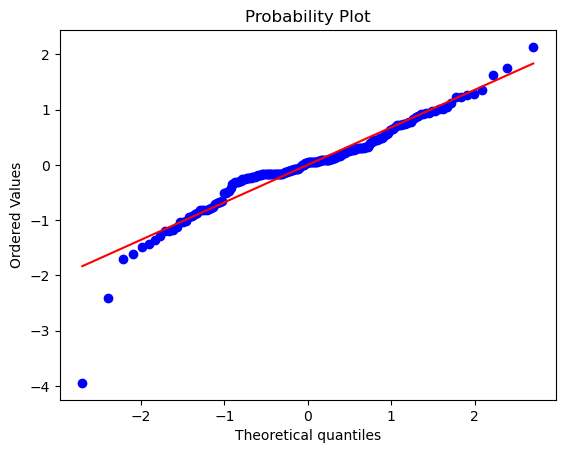

In [162]:
sts.probplot(ect_reg.resid, dist="norm", plot=plt)

From the QQ_plot, the residuals are mostly normally distributed because the points are close
to the normal distribution line. 

### Assessing model's F-test and T-tests

In [166]:
ect_reg.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     43.65
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           4.54e-30
Time:                        16:48:45   Log-Likelihood:                -213.19
No. Observations:                 201   AIC:                             438.4
Df Residuals:                     195   BIC:                             458.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0098      0.359      2.810      0.005       0.301       1.719
attitude1_01     0.4326      0.092      4.701      0.000       0.251       0.614
attitude1_03    -0.0186      0.072     -0.259      0.796      -0.161       0.124
peruse01         0.2496      0.059      4.224      0.000       0.133       0.366
satis01          0.1598      0.073      2.194      0.029       0.016       0.303
satis03          0.0564      0.063      0.891      0.374      -0.068       0.181
==============================================================================
Omnibus:                       55.301   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.597
Skew:                          -0.969   Prob(JB):                     3.83e-55
Kurtosis:                       8.116   Cond. No.                         94.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

peruse01 and attitude1_01 stood out. They have way larger t-values than other variables, 4.2 and 4.7. They also have a low p-value, meaning they are statistically significant. From a business perspective, the time that customers use per time and their attitude likely represent key indicators of customer behavior that should be considered when estimating customer intent.

### Equation

> intent1_01 = 1 + 0.43 attitude1_01 - 0.02 attitude1_03 + 0.25 peruse01 + 0.16 satis01 + 0.06 satis03



1. If attitude1_01 increases by 1, intent1_01 will increase by 0.43.
1. If attitude1_03 increases by 1, intent1_01 will decrease by 0.02.
1. If peruse01 increases by 1, intent1_01 will increase by 0.25.
1. If satis01 increases by 1, intent1_01 will increase by 0.16.
1. If satis03 increases by 1, intent1_01 will increase by 0.06.